In [2]:
%%bash
pip install pystan
pip install fbprophet

In [4]:
!git clone https://github.com/chrisoyer/ski-snow-modeling/


Cloning into 'ski-snow-modeling'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 987 (delta 85), reused 104 (delta 43), pack-reused 829
Receiving objects: 100% (987/987), 59.08 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (608/608), done.


In [27]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

In [23]:
all_data_path = r'./ski-snow-modeling/data/snow_data_clean.parquet'
long_series_df = pd.read_parquet(all_data_path)

def prep_data(query: str)-> pd.DataFrame:
    df = long_series_df.query(query)
    df = df[['timestamp', 'base', 'snowfall']].rename(columns={'timestamp': 'ds', 'base': 'y'}).dropna()
    return df
wp = prep_data('station=="Winter Park"')    

In [29]:
wp.shape

(1516, 3)

In [30]:
def train_test(df, train_perc):
    cut_row = int(train_per * df.shape[0])
    df_train, df_test = df.iloc[:cut_row, :], df.iloc[cut_row:, :].drop(columns=['y'])

wp_train, wp_test = train_test(wp, .8)

In [31]:
m = Prophet(mcmc_samples=300, changepoint_prior_scale=0.01, 
            seasonality_mode='multiplicative', yearly_seasonality=10,
            weekly_seasonality=True, daily_seasonality=False)

m.add_regressor('snowfall')
m.fit(wp_train)

# made df including space for predictions
future = m.make_future_dataframe(periods=365, freq='M')

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


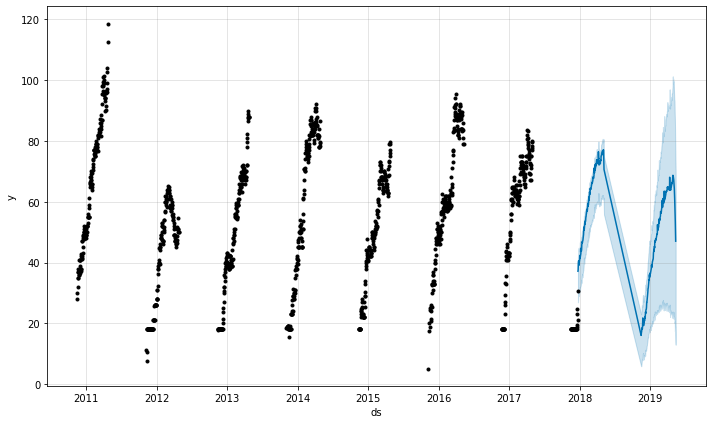

In [32]:
forecast = m.predict(wp_test)
fig1 = m.plot(forecast)

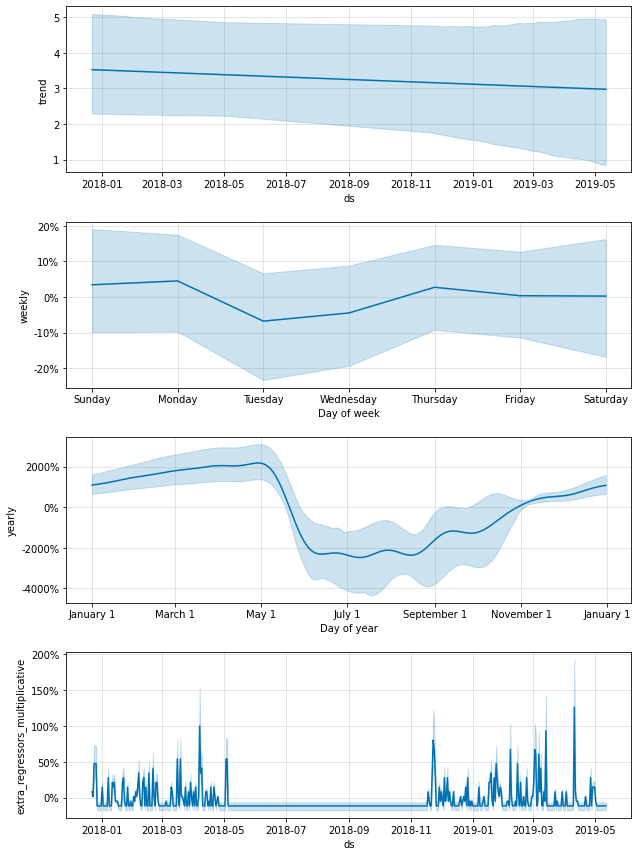

In [35]:
fig2 = m.plot_components(forecast)


In [ ]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
